In [0]:
import nltk
nltk.download('all')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

import re,string,unicodedata
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelBinarizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

print(tf.__version__)

2.2.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
catWiki = pd.read_csv("/content/catWiki.txt", sep='\n', header=None)
dogWiki = pd.read_csv("/content/dogWiki.txt", sep='\n', header=None)

catWiki.columns = ['text']
dogWiki.columns = ['text']

In [6]:
catWiki['class'] = 'cat'
dogWiki['class'] = 'dog'
data = catWiki
data = data.append(dogWiki)
data.head()

,text,class
0,The cat (Felis catus) is a domestic species of...,cat
1,The cat is similar in anatomy to the other fel...,cat
2,Female domestic cats can have kittens from spr...,cat
3,Cats were first domesticated in the Near East ...,cat
4,"As of 2017, the domestic cat was the second-mo...",cat


In [7]:
data.columns

Index(['text', 'class'], dtype='object')

In [0]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [0]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on text column
data['text']=data['text'].apply(denoise_text)

In [0]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on text column
data['text']=data['text'].apply(denoise_text)

In [11]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


#Apply function on text column
data['text']=data['text'].apply(remove_stopwords)

{'been', 'where', "won't", 'her', 'what', 'same', "wasn't", 'how', 'such', 'the', 'up', "wouldn't", 'have', "haven't", 'this', "that'll", 'you', "don't", 'she', 'myself', 'my', 'few', "should've", 'wasn', 'over', 'own', 'those', 'hadn', 'o', 'herself', 'not', "shouldn't", 'shouldn', 'above', 'ain', 'hasn', 'then', 'nor', 'after', 'is', 'some', 'of', 'its', 'themselves', 'me', 'are', 'yourselves', 'both', 'should', 'theirs', "it's", 'too', 'now', 'himself', "she's", 'aren', "couldn't", 'by', 'if', 'in', 'but', 'was', "shan't", 'shan', 'our', 'an', "you've", 'all', 'only', 's', 'has', 'wouldn', 'd', 'any', 'while', 'doesn', 'itself', "mustn't", 'didn', 'needn', 'very', 'these', 'your', 'we', 'before', 'be', 'm', 'who', 't', 'when', 'once', 'their', 'isn', 'through', "hadn't", 'it', 'between', 'do', "mightn't", 'doing', 'they', 'to', 'ma', 've', 'no', 'ours', 'that', 'y', 'under', 'other', 'mightn', 'am', "aren't", 'mustn', 'having', 'did', 'a', 'can', 'whom', 'again', 'he', "you'd", 'or'

In [12]:
from sklearn.preprocessing import LabelBinarizer
#labeling the data
lb=LabelBinarizer()
#transformed Label data
label_data=lb.fit_transform(data['class'])
#label_data
print(label_data.shape)

# labeling convert the classes as cat as "0" and Dog as "1"

(290, 1)


In [14]:
data.head()

,text,class
0,cat ( Felis catus ) domestic species small car...,cat
1,cat similar anatomy felid species : strong fle...,cat
2,Female domestic cats kittens spring late autum...,cat
3,Cats first domesticated Near East around 7500 ...,cat
4,"2017 , domestic cat second-most popular pet Un...",cat


In [0]:
data['label'] = label_data

In [16]:
data.tail()

,text,class,label
166,Art,dog,1
167,Main article : Cultural depictions dogs Wester...,dog,1
168,Cultural depictions dogs art extend back thous...,dog,1
169,Education appreciation,dog,1
170,"American Kennel Club reopened museum called "" ...",dog,1


# **#Word Frequencies with TfidfVectorizer**

Word counts are a good starting point, but are very basic.

One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

**Term Frequency:** This summarizes how often a given word appears within a document.

**Inverse Document Frequency:** This downscales words that appear a lot across documents.

The **TfidfVectorizer** will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.




**Feature Engineering**

In [17]:
"""
Feature Engineering
Next, we will take the preprocessed texts as input and calculate their TF-IDF's. We will retain 10 features per text.

"""

from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = data['text']
# create the transform
vectorizer = TfidfVectorizer(min_df=5, max_features=37)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(290, 37)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.34439175]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [18]:
print(vectorizer.vocabulary_)

{'cat': 7, 'domestic': 11, 'species': 31, 'domesticated': 12, 'often': 24, 'feral': 14, 'human': 17, 'cats': 8, 'humans': 18, 'breeds': 6, 'body': 4, 'prey': 29, 'like': 20, 'social': 30, 'female': 13, 'two': 33, 'known': 19, 'pet': 27, 'pets': 28, 'first': 15, 'also': 0, 'may': 23, 'years': 36, 'animals': 1, 'behavior': 3, 'main': 21, 'article': 2, 'one': 25, 'many': 22, 'study': 32, 'health': 16, 'dog': 9, 'breed': 5, 'people': 26, 'dogs': 10, 'wolf': 34, 'wolves': 35}


In [19]:
type(vector)

scipy.sparse.csr.csr_matrix

In [20]:
from sklearn.model_selection import train_test_split

# Split data to target (y) and features (X)
X = vector.toarray()
y = (np.array(data['label']))

# Here we split data to training and testing parts
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 0, stratify =y)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(X_train.shape, X_test.shape))

Train dataset shape: (232, 37), 
Test dataset shape: (58, 37)


In [0]:
#CNN accepst data in 3D
# we have to reshape teh data.
X_train= X_train.reshape(232,37,1)
X_test = X_test.reshape(58,37,1)

In [0]:
epochs = 60
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2, activation='relu', input_shape = (37,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 36, 32)            96        
_________________________________________________________________
batch_normalization_10 (Batc (None, 36, 32)            128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 36, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 35, 64)            4160      
_________________________________________________________________
batch_normalization_11 (Batc (None, 35, 64)            256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 35, 64)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2240)             

In [0]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/60
8/8 [==============================] - 0s 28ms/step - loss: 0.9919 - accuracy: 0.5991 - val_loss: 0.6868 - val_accuracy: 0.7586
Epoch 2/60
8/8 [==============================] - 0s 12ms/step - loss: 1.1141 - accuracy: 0.5603 - val_loss: 0.6845 - val_accuracy: 0.7931
Epoch 3/60
8/8 [==============================] - 0s 14ms/step - loss: 0.9217 - accuracy: 0.6250 - val_loss: 0.6827 - val_accuracy: 0.8103
Epoch 4/60
8/8 [==============================] - 0s 13ms/step - loss: 0.7741 - accuracy: 0.6638 - val_loss: 0.6808 - val_accuracy: 0.8103
Epoch 5/60
8/8 [==============================] - 0s 12ms/step - loss: 0.7652 - accuracy: 0.7026 - val_loss: 0.6791 - val_accuracy: 0.8103
Epoch 6/60
8/8 [==============================] - 0s 12ms/step - loss: 0.6875 - accuracy: 0.7198 - val_loss: 0.6775 - val_accuracy: 0.8448
Epoch 7/60
8/8 [==============================] - 0s 13ms/step - loss: 0.7718 - accuracy: 0.6810 - val_loss: 0.6756 - val_accuracy: 0.8448
Epoch 8/60
8/8 [===========

In [0]:
def plot_learningCurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accracy')
  plt.ylabel('Accuracy')
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'],loc ='upper left')
  plt.show()

  #plot training & valdiation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'],loc ='upper left')
  plt.show()

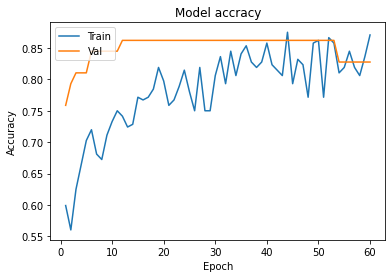

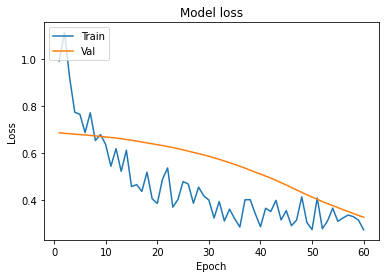

In [96]:
plot_learningCurve(history,epochs)

In [97]:
#for testing my samples

testData = pd.read_csv("/content/testSentences.txt", sep='\n', header=None)
testData.columns = ['content']
testData

,content
0,This animal is similar to the other felid spec...
1,This animal is similar to the wolf and fox.
2,This animal can detect a drug when hidden.
3,One type of animal acts as a guard of things.
4,Whiskers coughed up a hairball today.
5,This animal can understand a hand signal if pr...
6,He has a kitten.
7,This animal will catch a mouse when it seems i...
8,He carried a python across the street.
9,Python programming with machine learning has n...


In [0]:
#set stopwords to english
stop=set(stopwords.words('english'))


#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on text column
testData['content']=testData['content'].apply(remove_stopwords)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = testData['content']

# create the transform
vectorizer = TfidfVectorizer(min_df=0, max_features=37)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
highD_vector = vectorizer.transform(text)
# summarize encoded vector
print(highD_vector.shape)
print(highD_vector.toarray())
highD_vector =highD_vector.toarray()

{'animal': 2, 'similar': 27, 'felid': 9, 'species': 28, 'wolf': 36, 'fox': 10, 'detect': 7, 'drug': 8, 'hidden': 14, 'one': 21, 'type': 33, 'acts': 1, 'guard': 11, 'things': 30, 'whiskers': 35, 'coughed': 6, 'hairball': 12, 'today': 31, 'understand': 34, 'hand': 13, 'signal': 26, 'properly': 23, 'trained': 32, 'kitten': 16, 'catch': 5, 'mouse': 19, 'seems': 25, 'impossible': 15, 'carried': 4, 'python': 24, 'across': 0, 'street': 29, 'programming': 22, 'machine': 18, 'learning': 17, 'nothing': 20, 'animals': 3}
[2.70474809 2.70474809 1.45198512 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.29928298 2.70474809 2.70474809 2.29928298 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809]
(10, 37)
[[0.         0.         0.30937949 0.         0.         0.


In [100]:
highD_vector.shape

(10, 37)

In [0]:
import numpy as np 

flatten=highD_vector.flatten()
input_array = flatten.reshape([10, 37,1])

In [102]:
prediction = model.predict(input_array)
probability =prediction

for i in range(10):
  output =probability[i]
  print(output, sep='', end='')
  print("Dog") if output > 0.5 else print("cat")



# Save model
#model.save('classification_model.h5')

[0.8785318]Dog
[0.86361]Dog
[0.03198174]cat
[0.537996]Dog
[0.7973918]Dog
[0.52897847]Dog
[0.74985474]Dog
[0.4151338]cat
[0.38029507]cat
[0.53706473]Dog
